In [3]:
import random
import os

In [16]:
# Warmup:  Go Over Friday's Notebook examples of assert and try/except blocks

## Lecture 26:  Files & Directories

**Learning Objectives:**

- Use built-in functions with files: open, close, read, write

- Use a file object's iterator properties:  for, next, list

- Use these file-specific os module functions:
- os.listdir, os.mkdir, os.path.exists, os.path.isfile, os.path.isdir, os.path.join

- Use try/except blocks or a with statement to handle errors that may occur when using files

- This content Could be on Wednesday's exam



###  Use built-in functions with files: open, close, read, write

### make a file called debug_tips.txt and add this content:
Debug Tips:

Write the least amount of code you can test

Don't try to write the complete solution at first

Assume from the start that things will go wrong

Always know the state of your program (print out vital information)

In [14]:
# example 1a:  let's learn how to write to a file

# open a file,  give it a name, prepare it for writing
file_obj = open("debug_tips1.txt", "w")

# use the write command to write a string to the file...use \n for newline

# you MUST close the file for the changes to actual be stored in the file


# after you run the code, inspect the file in your Notebook tab

### make a file named nums.txt that contains 10 random ints between 1 and 5

In [12]:
path = "nums.txt"  
fo = None # how do you open a file? 

for i in range(10):
    fo.write(   str  (random.randint(1,5)) + "\n")

# what do you do when you are done? 

# after you run the code, inspect the file in your Notebook tab

# after you run the code, remove the close to prove that it does not write

### Now: Let's OVERWRITE THE FILE by writing 1M random ints (1 to 100) to a file


In [11]:

import random
path = "nums.txt"  
fo = None # How do you open a file? 
print(type(fo))

for i in range(1000000):
    fo.write(   str  (random.randint(1,100)) + "\n")
    
# what do you have to do when you are done? 

### Exam question:  
### Q: if you open a file for writing that already exists, what happens?
### A: .......

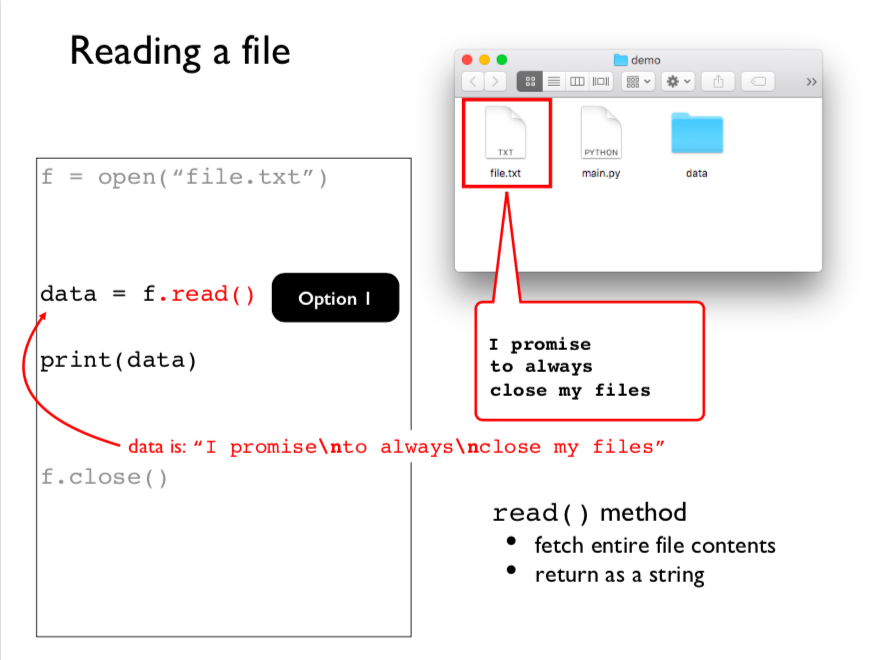

In [15]:
path = "debug_tips1.txt"

# create a file object but open for READING

f_obj = open(path) # "r" is optional
data = f_obj.read()
print(type(f_obj)
print(type(data))
print(data)
f_obj.close()

<class 'str'>
Debug Tips:
Write the least amount of code you can test



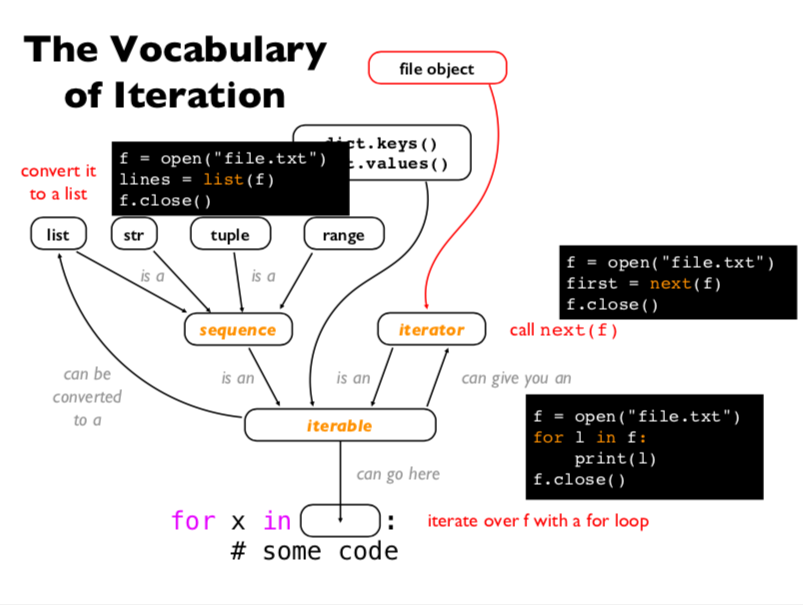


###  Use a file object's iterator properties: for, next, list

In [19]:
# File Objects are iterators
# Because a file object is an iterator, we can
# use a for loop
# use next to get the next thing in the file
# use the list function to generate a list of its contents


# Do you remember how to read in a file? 
# hint use the open function, a path, and store the result in a file object


path = "debug_tips2.txt"
# create a file object but open for READING
f_obj = open(path, "r")

# use a for loop to grab a line
for line in f_obj:
    print(line)
# more efficient, especially when dealing with Big Data

# its good practice to close the file
f_obj.close()




# 

Debug Tips:

1. Write the least amount of code you can test



### Use these file-specific os module functions:

- os.listdir
- os.mkdir 
- os.path.exists 
- os.path.isfile
- os.path.isdir 
- os.path.join

In [21]:
import os

os.listdir(".") # creates a list from the contents of a directory
# "." is similar to what you do in Terminal with "ls ."

['nums.txt',
 'lec_27_850.ipynb',
 'debug_tips1.txt',
 'lecture27end.ipynb',
 'debug_tips2.txt',
 '.ipynb_checkpoints',
 'lec_27_complete.ipynb',
 'lec_27_955.ipynb',
 'lec_27_template.ipynb']

In [22]:
# make a directory
os.mkdir("my_folder")
# similar to mkdir command in Terminal
# note if you try the same command twice, the 2nd time you will get an error

os.listdir(".")

['nums.txt',
 'lec_27_850.ipynb',
 'debug_tips1.txt',
 'lecture27end.ipynb',
 'debug_tips2.txt',
 '.ipynb_checkpoints',
 'lec_27_complete.ipynb',
 'lec_27_955.ipynb',
 'lec_27_template.ipynb']

In [26]:
# os.path is a sub-module of os .... does not need importing again
#print(os.path.exists("somefile.txt")) #does this file (at this path) exist?
#print(os.path.isfile("lecture19")) #nope
#print(os.path.isdir("lecture19")) # yes 


False
False
True


## most important os command:  os.path.join

In [28]:
# this function is like the regular join method, which combines things into a string
# but automatically senses which OS you are using and joins them with either a \ or /

#path = os.path.join("my_folder","file1.txt")
#print(path)  # what do you get? 

my_folder/file1.txt


### There are lots of things that can go wrong when reading or writing files
- file does not exist
- you don't have write permission
- not enough space on the drive to write out the entire file
- use a directory name in place file name (or vice versa)
- and more....

In [ ]:
# try opening a file for reading that does not exist.

### Use try/except blocks for code that might crash

In [42]:
# let's figure out how to handle a command to open a file that does not exist

path = input("enter the name of the file to open:")
try:
    file_object = open(path, "r")  # "r" is for reading, but is the default
    d = file_object.read()
    print(d)
    file_object.close()
except FileNotFoundError as e:
    print(type(e))
    print(path, "could not be opened")



enter the name of the file to open:hello
<class 'FileNotFoundError'>
hello could not be opened


### Python is all about shortening code. Is there a way to shorten the process of:
- opening a file
- handling any Errors while reading/writing
- closing the file

In [44]:
# we can use a 'with' statement to shorten our code

with open("some_numbers.txt", "w") as f: 
    for i in range(10):
        f.write(str(random.randint(1,100)) + "\n")
                
# don't need to close
# don't need to worry about try/except

In [ ]:
# take a look at your file organizer to find the file some_numbers.txt

**Case Studies:  Mostly finished, larger programs**

Goal:  Run the program, read the code, make small changes


In [62]:
# Case Study: score tracker

# remember:  a JSON file is structured like a Python dictionary
# so its easy to convert back and forth


import json  # to read/write a JSON file
import os    # to see if score file exists

def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f) # dict, list, etc

# data is a dict, list, etc
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)
        

def add_point(player_name, file_name):
    data = {}

    #Check if "point.json" exists, if so load data from it
    if os.path.exists(file_name):
        data = read_json(file_name)
        #Check if player is a known player
        if player_name in data:
            data[player_name] += 1
        else:
            data[player_name] = 1
        write_json(file_name, data)
    else:                         # file does not exist, make it
        data[player_name] = 1
        write_json(file_name, data)

   #TODO: print out each person's score


In [63]:
add_point("Andy", "points.json")
# you can try this yourself...different name, different file
# then, go back to your Jupyter Notebook directory and open the file you made

{'Andy': 12, 'Rachel': 6}


In [65]:
add_point("Rachel", "points.json")

{'Andy': 12, 'Rachel': 8}


In [67]:
# Case Study: recursive file searcher
# in an earlier lecture we wrote a function that recursively searches a list of lists
# this program takes that idea and applies to files and directories

# to understand this program you might want to first see what directories you have


print("this directory's contents \n", os.listdir("."))
# TODO: try naming a directory based on the current directory this file resides in
# TODO: find one directory, print out its contents

this directory's contents 
 ['lecture6af.ipynb', 'lec12af.ipynb', 'lecture15before.ipynb', 'lecture24af.ipynb', 'lecture18', 'Untitled.ipynb', 'lecture16', 'project9', 'lecture10af.ipynb', 'lecture17', 'lecture21', 'lecture19', 'lecture16end.ipynb', 'lec09af.ipynb', 'lecture11af.ipynb', 'lecture27begin.ipynb', 'storage', 'debug_tips.txt', 'lecture05.ipynb', 'points.json', 'lecture24afend.ipynb', 'lecture15af.ipynb', 'lec05_selfcheck.ipynb', 'lec14af.ipynb', '.ipynb_checkpoints', 'lecture16mwf.ipynb', 'some_numbers.txt', 'lecture24.ipynb', 'lec07af.ipynb']


In [ ]:
# program recursive file searcher

import os

def recursiveDirSearch(searchDirectory, searchFileName):
    
    for curr in os.listdir(searchDirectory):   
        
        # build a path to this current thing
        curr = os.path.join(searchDirectory, curr) 
        
        #check if curr is a file
        if os.path.isfile(curr):
            #check if it contains the search name 
            if searchFileName in curr:     # base case...no recursive call
                f = open(curr)
                contents = f.read(50) # reads first 50 chars into a string
                f.close()
                return contents
        else:                              # recursive case!!
            contents = recursiveDirSearch(curr, searchFileName)
            if contents != None:           # we found something
                return contents           
            
    # finished all recursive searching and never found it   
    return None       


# this function is like our main program
def dir_search(dir_name, file_name):
    if not os.path.exists(dir_name):
        print("Unable to find searchDirectory!")
    else:
        contents = recursiveDirSearch(dir_name, file_name)
        if contents != None:
            print(contents, end = "")
            
    # TODO:  figure out how to print "<file_name> not found"




In [ ]:
dir_search(".", "rlookup.py")

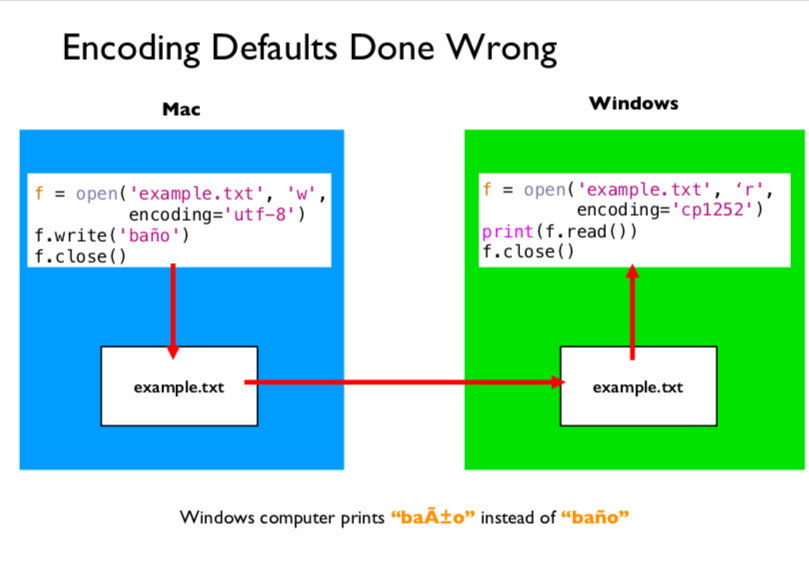

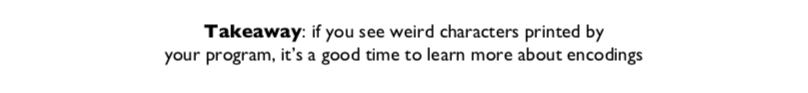
